In [5]:
# CNN : 성인 남녀 얼굴 이미지 분류 (이항 분류)
import cv2, os, numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [6]:
img_dir = '/Users/bunny/Documents/person_img'
xdata, ydata = [], []

# 남여 구분 라벨 구하기 - 파일명에서 추출 30_0_0_20170119195539771.jpg - split 함수

for file in os.listdir(img_dir):
    try:
        gender = int(file.split('_')[1])    # 0 - male, 1 - female
        img_path = os.path.join(img_dir, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64,64)) # 크기 축소
        xdata.append(img)
        ydata.append(gender)
    except:
        continue

print(xdata[0])
print(ydata[0])

xdata = np.array(xdata) / 255.0
ydata = np.array(ydata)

[[[128 137 122]
  [198 187 172]
  [222 189 170]
  ...
  [234 189 172]
  [223 191 176]
  [214 194 181]]

 [[135 136 122]
  [204 188 172]
  [225 189 171]
  ...
  [236 190 173]
  [225 191 177]
  [216 195 183]]

 [[141 134 121]
  [209 186 172]
  [224 186 169]
  ...
  [234 190 173]
  [223 192 177]
  [213 195 182]]

 ...

 [[ 93  91  91]
  [ 38  36  36]
  [ 45  43  43]
  ...
  [ 65  58  55]
  [ 65  53  51]
  [ 84  71  69]]

 [[113 111 111]
  [ 37  35  35]
  [ 39  37  37]
  ...
  [ 65  57  54]
  [ 71  59  57]
  [ 87  75  72]]

 [[113 111 111]
  [ 37  35  35]
  [ 42  40  40]
  ...
  [ 63  56  53]
  [ 68  56  54]
  [ 90  77  75]]]
0


In [ ]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 모델
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(64,64,3)), # color일 경우 3(채널)
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

(102, 64, 64, 3) (26, 64, 64, 3) (102,) (26,)


2025-09-19 14:54:03.629861: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-19 14:54:03.629959: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-19 14:54:03.629979: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-19 14:54:03.630281: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-19 14:54:03.630300: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.3, verbose=2)

loss, acc = model.evaluate(x_test, y_test)
print(f'test acc : {acc:.4f}')
print(f'test loss : {loss:.4f}')

Epoch 1/50


2025-09-19 14:54:10.318806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3/3 - 2s - 528ms/step - accuracy: 0.5634 - loss: 1.6725 - val_accuracy: 0.5806 - val_loss: 3.2751
Epoch 2/50
3/3 - 0s - 35ms/step - accuracy: 0.7746 - loss: 1.6669 - val_accuracy: 0.5806 - val_loss: 1.2459
Epoch 3/50
3/3 - 0s - 33ms/step - accuracy: 0.7746 - loss: 0.6766 - val_accuracy: 0.5806 - val_loss: 0.7057
Epoch 4/50
3/3 - 0s - 31ms/step - accuracy: 0.7183 - loss: 0.5962 - val_accuracy: 0.5806 - val_loss: 0.6861
Epoch 5/50
3/3 - 0s - 43ms/step - accuracy: 0.5070 - loss: 0.7062 - val_accuracy: 0.4194 - val_loss: 0.7034
Epoch 6/50
3/3 - 0s - 32ms/step - accuracy: 0.5775 - loss: 0.6832 - val_accuracy: 0.4516 - val_loss: 0.6989
Epoch 7/50
3/3 - 0s - 31ms/step - accuracy: 0.6056 - loss: 0.6622 - val_accuracy: 0.5806 - val_loss: 0.6868
Epoch 8/50
3/3 - 0s - 32ms/step - accuracy: 0.7324 - loss: 0.5846 - val_accuracy: 0.5806 - val_loss: 0.7656
Epoch 9/50
3/3 - 0s - 31ms/step - accuracy: 0.7887 - loss: 0.5476 - val_accuracy: 0.5806 - val_loss: 0.9338
Epoch 10/50
3/3 - 0s - 31ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
예측값 : [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
실제값 : [0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1]


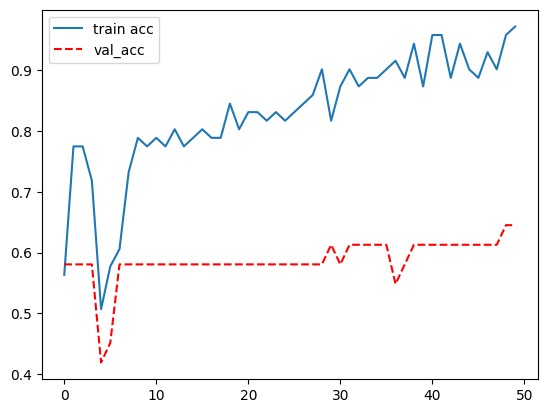

In [9]:
# 예측
pred = model.predict(x_test)
print(f"예측값 : {(pred >= 0.5).astype(int).reshape(-1)}")
print(f"실제값 : {y_test}")

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], 'r--' ,label='val_acc')
plt.legend(loc='best')
plt.show()
plt.close()

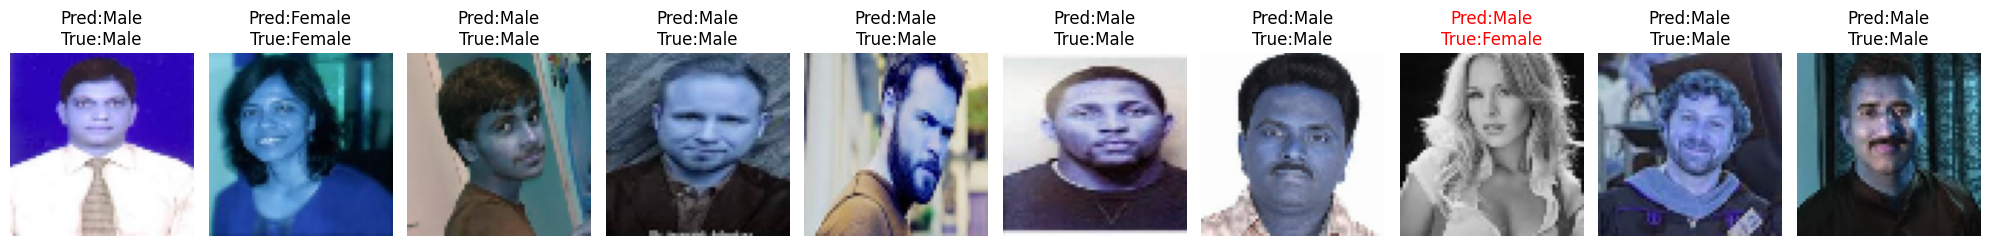

In [14]:
pred_classes = (pred >= 0.5).astype(int).reshape(-1)
true_classes = y_test

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i])
    
    # 예측값과 실제값 비교 표시
    is_correct = pred_classes[i] == true_classes[i]
    label = 'Female' if true_classes[i]==1 else 'Male'
    prediction = 'Female' if pred_classes[i]==1 else 'Male'
    
    title_color = 'black' if is_correct else 'red'
    
    plt.title(f"Pred:{prediction}\nTrue:{label}", color=title_color)
    plt.axis('off')
    
plt.tight_layout()
plt.show()
plt.close()